<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# *Data Science Unit 4 Sprint 2 Assignment 1*

Use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*

## Load Your Data

In [1]:

import numpy as np
import tensorflow as tf 

data = np.load('quickdraw10.npz')
X = data['arr_0']
y = data['arr_1']

print(X.shape)
print(y.shape)

(100000, 784)
(100000,)


In [2]:
class_names = ['apple',
 'anvil',
 'airplane',
 'banana',
 'The Eiffel Tower',
 'The Mona Lisa',
 'The Great Wall of China',
 'alarm clock',
 'ant',
 'asparagus']

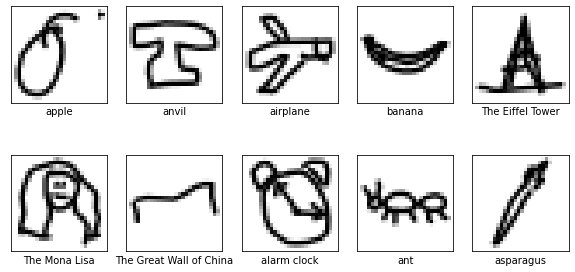

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
start = 0

for num, name in enumerate(class_names):
    plt.subplot(2,5, num+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[start].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(name)
    start += 10000
plt.show()

In [4]:
# Need this line to randomly shuffle both the X & y at the same time.

from sklearn.utils import shuffle
X, y = shuffle(X, y)

In [5]:
X.shape, y.shape

((100000, 784), (100000,))

## Build Your Baseline Model
Some Hints:


*  Model should have 784 input values (like mnist)
*  Use `sparse_categorical_crossentropy` as your loss function.
* You need 10 neurons in your last layer for output
* You can add as many hidden layers with as many neurons in them as you like. 
* Limit your model epochs to 30 each time you fit.
* You can use the `validation_split` command to automatically create a training / validation dataset.  Specify a percentage such as .2 in your fit statement. 



In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [7]:
model = Sequential() # https://keras.io/getting-started/sequential-model-guide/
# Hidden Layer #1
model.add(Dense(units=128, input_dim=784, activation='sigmoid', name='Input_Layer'))

# Hidden Layer #2
model.add(Dense(units=128, activation='sigmoid'))

# Output Layer, specify the number of labels 
model.add(Dense(units=10, activation='softmax'))

# Print summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (Dense)          (None, 128)               100480    
_________________________________________________________________
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='SGD', 
              metrics=['accuracy'])

In [9]:
baseline_1 = model.fit(X, 
          y, 
          batch_size=32,
          validation_split=0.2,
          epochs=30)

Epoch 1/30
2500/2500 [==============================] - 6s 2ms/step - loss: 1.8686 - accuracy: 0.4351 - val_loss: 1.1110 - val_accuracy: 0.6942
Epoch 2/30
2500/2500 [==============================] - 5s 2ms/step - loss: 1.0423 - accuracy: 0.7025 - val_loss: 0.9032 - val_accuracy: 0.7290
Epoch 3/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.8890 - accuracy: 0.7339 - val_loss: 0.8357 - val_accuracy: 0.7496
Epoch 4/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.8242 - accuracy: 0.7533 - val_loss: 0.8028 - val_accuracy: 0.7569
Epoch 5/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.7916 - accuracy: 0.7621 - val_loss: 0.7735 - val_accuracy: 0.7653
Epoch 6/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.7554 - accuracy: 0.7724 - val_loss: 0.7507 - val_accuracy: 0.7764
Epoch 7/30
2500/2500 [==============================] - 5s 2ms/step - loss: 0.7458 - accuracy: 0.7750 - val_loss: 0.7405 - val_accuracy:

### Visualize the results

Create charts for both loss and accuracy by epoch. Use line graphs for both charts. Analyze the results. 

At what point should we have stopped training the model and why? 

In [10]:
# baseline_1.history

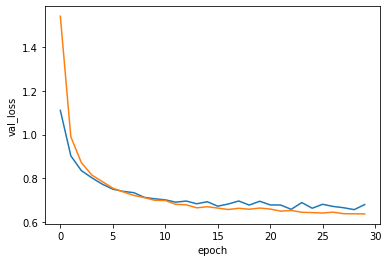

In [11]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame.from_records(baseline_1.history)
df['epoch'] = [i for i in range(df.shape[0])]

ax = sns.lineplot(x='epoch', y='val_loss', data=df)
ax = sns.lineplot(x='epoch', y='loss', data=df);

## Change Optimizers
Try using the keras `adam` optimizer instead of `sgd` in your model. Visualize the difference in validation loss between the models with different optimizers. 

In [12]:
# from tf.keras.optimizers import Adam
import tensorflow as tf
from tensorflow import keras
from keras.optimizers import Adam

adam = Adam()


In [13]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=adam, 
              metrics=['accuracy'])

In [14]:
baseline_2 = model.fit(X, 
          y, 
          batch_size=32,
          validation_split=0.2,
          epochs=30)

Epoch 1/30
2500/2500 [==============================] - 7s 3ms/step - loss: 0.6812 - accuracy: 0.7884 - val_loss: 0.7208 - val_accuracy: 0.7750
Epoch 2/30
2500/2500 [==============================] - 6s 3ms/step - loss: 0.7048 - accuracy: 0.7824 - val_loss: 0.6998 - val_accuracy: 0.7844
Epoch 3/30
2500/2500 [==============================] - 6s 3ms/step - loss: 0.6812 - accuracy: 0.7888 - val_loss: 0.6893 - val_accuracy: 0.7863
Epoch 4/30
2500/2500 [==============================] - 6s 2ms/step - loss: 0.6715 - accuracy: 0.7876 - val_loss: 0.6798 - val_accuracy: 0.7859
Epoch 5/30
2500/2500 [==============================] - 6s 3ms/step - loss: 0.6767 - accuracy: 0.7868 - val_loss: 0.6932 - val_accuracy: 0.7831
Epoch 6/30
2500/2500 [==============================] - 6s 3ms/step - loss: 0.6663 - accuracy: 0.7893 - val_loss: 0.6791 - val_accuracy: 0.7864
Epoch 7/30
2500/2500 [==============================] - 6s 3ms/step - loss: 0.6553 - accuracy: 0.7931 - val_loss: 0.6570 - val_accuracy:

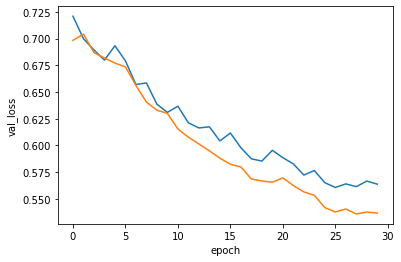

In [15]:
df_atam = pd.DataFrame.from_records(baseline_2.history)
df_atam['epoch'] = [i for i in range(df_atam.shape[0])]

ax = sns.lineplot(x='epoch', y='val_loss', data=df_atam)
ax = sns.lineplot(x='epoch', y='loss', data=df_atam);

### Additional Written Tasks:
In this section, you will need to search for resources: 
1. Investigate the various [loss functions](https://www.tensorflow.org/api_docs/python/tf/keras/losses). Which is best suited for the task at hand (predicting 1 / 0) and why? 
2. What is the difference between a loss function and a metric? Why might we need both in Keras? 
3. Investigate the various [optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers). Stochastic[随机的] Gradient Descent (`sgd`) is not the learning algorithm dejour anyone. Why is that? What do newer optimizers such as `adam` have to offer? 

### My answer:
1. [tf.keras.losses.binary_crossentropy](https://https://www.tensorflow.org/api_docs/python/tf/keras/losses/binary_crossentropy) is best suited for predicting 1 / 0
2. What is the difference between a loss function and a metric? Why might we need both in Keras?

* The loss function is used to optimize your model. This is the function that will get minimized by the optimizer.

* A metric is used to judge the performance of your model. This is only for you to look at and has nothing to do with the optimization process.

* We need both to decide when the model is overfitting

3. Adam is computationally efficient, has little memory requirement, invariant to diagonal rescaling of gradients, and is well suited for problems that are large in terms of data/parameters


## Stretch Goals: 

- Research convolutional neural networks and try including convolution layers in your network.
- Pick two classes and make QuickDraw a binary classification problem, how does your model architecture change?
- Implement Cross Validation model evaluation on your Quickdraw implementation 

Watch some more videos on Gradient Descent:
- [Gradient Descent, Step-by-Step](https://www.youtube.com/watch?v=sDv4f4s2SB8)  by StatQuest w/ Josh Starmer. This will help you understand the gradient descent based optimization that happens underneath the hood of neural networks. It uses a non-neural network example, which I believe is a gentler introduction. You will hear me refer to this technique as "vanilla" gradient descent. 
- [Stochastic Gradient Descent, Clearly Explained!!!](https://www.youtube.com/watch?v=vMh0zPT0tLI) by StatQuest w/ Josh Starmer. This builds on the techniques in the previous video.  This technique is the one that is actually implemented inside modern 'nets. 
- [Siraj Raval the evolution of gradient descent](https://www.youtube.com/watch?v=nhqo0u1a6fw)